Construção da matriz de termos e documentos


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

documents = ["Romeo and Juliet", 
             "Juliet: O happy dagger!", 
             "Romeo died by dagger", 
             "Live free or die, thats the New-Hampshire motto",
             "Did you know, New-Hampshire is in New-England"]

vocabulary = ["romeo", "juliet", "happy", "dagger", "live", "die", "free", "new-hampshire"]
cv = CountVectorizer(vocabulary= vocabulary, stop_words= stopwords.words("english"))

# Term-document matrix
A = cv.fit_transform(documents).transpose().toarray()
A

array([[1, 0, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0]])

A matriz A é a matriz que relaciona termos e documentos (term-document frequency matrix).
O numero "m" de linhas corresponde a quantidade de palavras do vocabulário utilizado. O número "n" de colunas indica a quantidade de documentos.

In [95]:
#Document-Document matrix
B = A.transpose().dot(A)
B.shape

(5, 5)

A matriz B tem dimensões nxn. Ela relaciona os documentos entre si. o elemento B_ij indica quantos termos os documentos i e j possuem em comum

In [94]:
#Term-Term matrix
C = A.dot(A.transpose())
C.shape

(8, 8)

A matriz C relaciona os termos entre si. Ela tem dimensões mxm. A entrada C(i,j) indica a quantidade de documentos em que os termos i e j aparecem juntos.

In [47]:
import numpy as np
from numpy.linalg import eig
from pprint import pprint

m,n = A.shape

S = eig(B)[1]          # Calcula a matriz de autovetores de B. 
U = eig(C)[1]          # Calcula a matriz de autovetores de C. 
E = np.diag(np.sqrt(eig(B)[0]))    # Calcula a matriz de valores singulares de A através da raiz quadrada dos 
                                   # autovalores de B.

*Truncando as matrizes S, U e E:*

Podemos desprezar as linhas e colunas da matriz E correspodentes aos menores autovalores. Esse corte é subjetivo.


In [84]:
# Deixando somente as duas primeiras linhas e colunas
Ek = np.delete(np.delete(E, np.s_[2:], axis=0), np.s_[2:], axis = 1)


Uk = np.delete(U, np.s_[2:], axis=1)
Sk = np.delete(S, np.s_[2:], axis=1)

Ak = Sk.dot(Ek).dot(Sk.transpose())

<IPython.core.display.Javascript object>


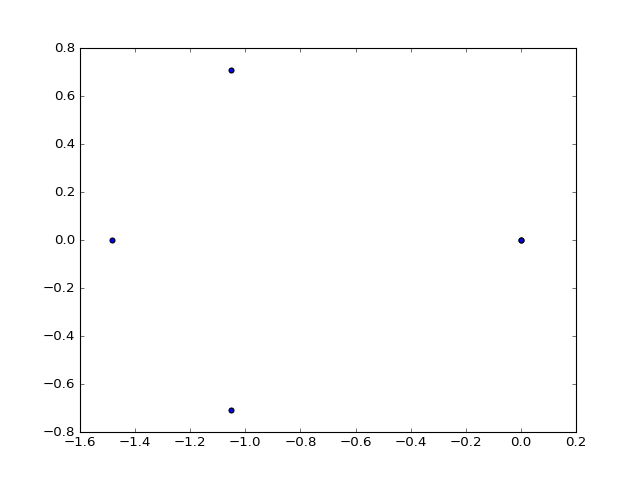

In [96]:
from matplotlib import pyplot as plt

X = Sk.dot(Ek)
%matplotlib notebook
plt.scatter(X[:,0], X[:,1])

In [98]:
from pandas import DataFrame
df = DataFrame(data= X)
df

,0,1
0,-1.050501,-7.071068e-01
1,-1.485633,1.082878e-15
2,-1.050501,7.071068e-01
3,0.000000,0.000000e+00
4,0.000000,0.000000e+00


<IPython.core.display.Javascript object>


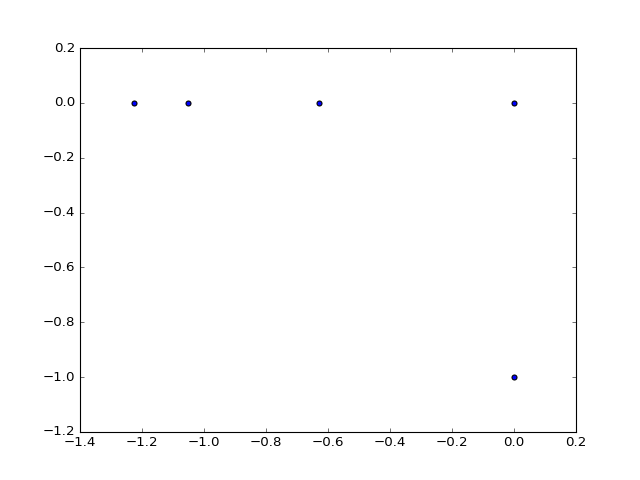

In [107]:
from numpy.linalg import svd
U, S, V = svd(A, full_matrices=False)
S = np.diag(S)

X = S.dot(V.transpose())
%matplotlib notebook
plt.scatter(X[:,0], X[:,1])


In [79]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD()
X = svd.fit_transform(A.transpose())
X

array([[  1.05050149e+00,   0.00000000e+00],
       [  1.48563346e+00,   6.19604721e-16],
       [  1.05050149e+00,  -9.59539710e-16],
       [  5.05137568e-17,   1.73205081e+00],
       [  0.00000000e+00,   0.00000000e+00]])

<IPython.core.display.Javascript object>


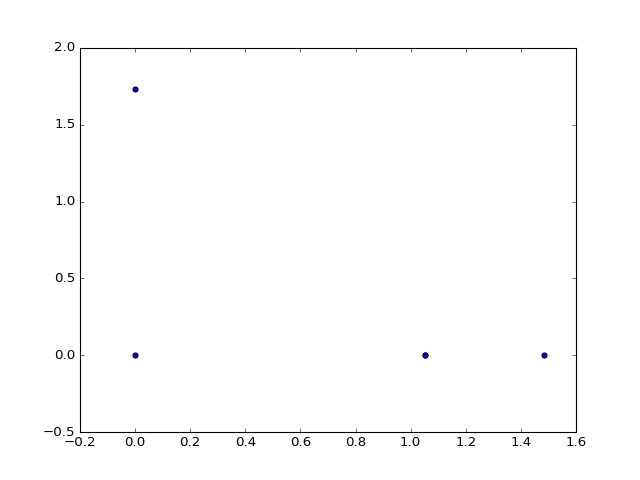

In [76]:
from matplotlib import pyplot as plt

%matplotlib notebook
plt.scatter(X[:,0], X[:,1])